In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import keras
from zipfile import ZipFile
import pickle
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, QuantileTransformer
from keras.preprocessing import timeseries_dataset_from_array as ts_split
from keras import layers as kl

In [2]:
# Open the pickle file
df = pickle.load(open('../../data/processed/merged_data_202506191400.pkl', 'rb'))
df

,AAL_%Chg,ALGT_%Chg,ALK_%Chg,DAL_%Chg,ITA_%Chg,IYT_%Chg,JBLU_%Chg,JETS_%Chg,LUV_%Chg,UAL_%Chg,...,month_of_year_11,month_of_year_12,hour_of_day_9,hour_of_day_10,hour_of_day_11,hour_of_day_12,hour_of_day_13,hour_of_day_14,hour_of_day_15,is_open
2018-01-02 09:30:00,0.13,0.52,1.31,0.31,0.08,0.80,0.13,0.68,0.49,0.43,...,False,False,True,False,False,False,False,False,False,1
2018-01-02 09:45:00,0.19,-0.88,0.05,-0.13,-0.12,0.07,-0.25,-0.04,0.43,-0.25,...,False,False,True,False,False,False,False,False,False,0
2018-01-02 10:00:00,-0.08,1.09,0.18,0.22,0.17,0.23,0.27,0.32,-0.18,0.13,...,False,False,False,True,False,False,False,False,False,0
2018-01-02 10:15:00,0.02,-0.03,0.20,0.03,-0.16,-0.29,-0.38,-0.01,-0.27,0.28,...,False,False,False,True,False,False,False,False,False,0
2018-01-02 10:30:00,0.04,-0.74,0.05,0.30,-0.18,-0.09,-0.04,-0.08,0.30,0.24,...,False,False,False,True,False,False,False,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-30 14:45:00,0.22,0.13,0.09,0.02,0.10,0.12,0.39,0.09,0.12,0.29,...,False,False,False,False,False,False,False,True,False,0
2025-05-30 15:00:00,0.09,-0.03,-0.09,0.21,0.11,0.02,-0.39,0.07,0.21,0.05,...,False,False,False,False,False,False,False,False,True,0
2025-05-30 15:15:00,0.26,0.21,0.24,0.35,0.22,0.18,0.29,0.22,0.21,0.49,...,False,False,False,False,False,False,False,False,True,0
2025-05-30 15:30:00,-0.13,-0.11,-0.31,-0.24,-0.11,-0.14,-0.49,-0.09,-0.15,-0.19,...,False,False,False,False,False,False,False,False,True,0


In [45]:
list(df.columns)[-100:]

['Article Count_JBLU_96',
 'Tone_LUV_96',
 'Polarity_LUV_96',
 'Word Count_LUV_96',
 'PCA_GKG1_0_LUV_96',
 'PCA_GKG1_1_LUV_96',
 'PCA_GKG1_2_LUV_96',
 'PCA_GKG1_3_LUV_96',
 'PCA_GKG1_4_LUV_96',
 'PCA_Scored_0_LUV_96',
 'PCA_Scored_1_LUV_96',
 'PCA_Scored_2_LUV_96',
 'PCA_Scored_3_LUV_96',
 'PCA_Scored_4_LUV_96',
 'PCA_Word_0_LUV_96',
 'PCA_Word_1_LUV_96',
 'PCA_Word_2_LUV_96',
 'PCA_Word_3_LUV_96',
 'PCA_Word_4_LUV_96',
 'Article Count_LUV_96',
 'Tone_UAL_96',
 'Polarity_UAL_96',
 'Word Count_UAL_96',
 'PCA_GKG1_0_UAL_96',
 'PCA_GKG1_1_UAL_96',
 'PCA_GKG1_2_UAL_96',
 'PCA_GKG1_3_UAL_96',
 'PCA_GKG1_4_UAL_96',
 'PCA_Scored_0_UAL_96',
 'PCA_Scored_1_UAL_96',
 'PCA_Scored_2_UAL_96',
 'PCA_Scored_3_UAL_96',
 'PCA_Scored_4_UAL_96',
 'PCA_Word_0_UAL_96',
 'PCA_Word_1_UAL_96',
 'PCA_Word_2_UAL_96',
 'PCA_Word_3_UAL_96',
 'PCA_Word_4_UAL_96',
 'Article Count_UAL_96',
 'Tone_ALGT_96',
 'Polarity_ALGT_96',
 'Word Count_ALGT_96',
 'PCA_GKG1_0_ALGT_96',
 'PCA_GKG1_1_ALGT_96',
 'PCA_GKG1_2_ALGT_96'

In [44]:
list(df.columns)

['AAL_%Chg',
 'ALGT_%Chg',
 'ALK_%Chg',
 'DAL_%Chg',
 'ITA_%Chg',
 'IYT_%Chg',
 'JBLU_%Chg',
 'JETS_%Chg',
 'LUV_%Chg',
 'UAL_%Chg',
 'AAL_Change',
 'ALGT_Change',
 'ALK_Change',
 'DAL_Change',
 'ITA_Change',
 'IYT_Change',
 'JBLU_Change',
 'JETS_Change',
 'LUV_Change',
 'UAL_Change',
 'AAL_High',
 'ALGT_High',
 'ALK_High',
 'DAL_High',
 'ITA_High',
 'IYT_High',
 'JBLU_High',
 'JETS_High',
 'LUV_High',
 'UAL_High',
 'AAL_High-Low',
 'ALGT_High-Low',
 'ALK_High-Low',
 'DAL_High-Low',
 'ITA_High-Low',
 'IYT_High-Low',
 'JBLU_High-Low',
 'JETS_High-Low',
 'LUV_High-Low',
 'UAL_High-Low',
 'AAL_High-Low%',
 'ALGT_High-Low%',
 'ALK_High-Low%',
 'DAL_High-Low%',
 'ITA_High-Low%',
 'IYT_High-Low%',
 'JBLU_High-Low%',
 'JETS_High-Low%',
 'LUV_High-Low%',
 'UAL_High-Low%',
 'AAL_Last',
 'ALGT_Last',
 'ALK_Last',
 'DAL_Last',
 'ITA_Last',
 'IYT_Last',
 'JBLU_Last',
 'JETS_Last',
 'LUV_Last',
 'UAL_Last',
 'AAL_Last-Open',
 'ALGT_Last-Open',
 'ALK_Last-Open',
 'DAL_Last-Open',
 'ITA_Last-Open',
 

In [9]:
# Print all columns containing "AAL"
list([col for col in df.columns if 'AAL' in col])


['AAL_%Chg',
 'AAL_Change',
 'AAL_High',
 'AAL_High-Low',
 'AAL_High-Low%',
 'AAL_Last',
 'AAL_Last-Open',
 'AAL_Last-Open%',
 'AAL_Low',
 'AAL_MA12_Last',
 'AAL_MA4_Last',
 'AAL_Open',
 'AAL_Roll_SDSD_Last_10',
 'AAL_Roll_SDSD_Volume_10',
 'AAL_Roll_SD_Last_10',
 'AAL_Roll_SD_Volume_10',
 'AAL_Volume',
 'Tone_AAL',
 'Polarity_AAL',
 'Word Count_AAL',
 'PCA_GKG1_0_AAL',
 'PCA_GKG1_1_AAL',
 'PCA_GKG1_2_AAL',
 'PCA_GKG1_3_AAL',
 'PCA_GKG1_4_AAL',
 'PCA_Scored_0_AAL',
 'PCA_Scored_1_AAL',
 'PCA_Scored_2_AAL',
 'PCA_Scored_3_AAL',
 'PCA_Scored_4_AAL',
 'PCA_Word_0_AAL',
 'PCA_Word_1_AAL',
 'PCA_Word_2_AAL',
 'PCA_Word_3_AAL',
 'PCA_Word_4_AAL',
 'Article Count_AAL',
 'Tone_AAL_4',
 'Polarity_AAL_4',
 'Word Count_AAL_4',
 'PCA_GKG1_0_AAL_4',
 'PCA_GKG1_1_AAL_4',
 'PCA_GKG1_2_AAL_4',
 'PCA_GKG1_3_AAL_4',
 'PCA_GKG1_4_AAL_4',
 'PCA_Scored_0_AAL_4',
 'PCA_Scored_1_AAL_4',
 'PCA_Scored_2_AAL_4',
 'PCA_Scored_3_AAL_4',
 'PCA_Scored_4_AAL_4',
 'PCA_Word_0_AAL_4',
 'PCA_Word_1_AAL_4',
 'PCA_Word_2

In [ ]:
# Data preprocessing
y_cols = ['AAL_Change']
x_cols = ['AAL_Change',
        'AAL_%Chg','AAL_High','AAL_High-Low','AAL_High-Low%','AAL_Last','AAL_Last-Open','AAL_Last-Open%','AAL_Low','AAL_MA12_Last','AAL_MA4_Last','AAL_Open','AAL_Roll_SDSD_Last_10','AAL_Roll_SDSD_Volume_10','AAL_Roll_SD_Last_10','AAL_Roll_SD_Volume_10','AAL_Volume',
        'Oil_Open','Oil_High','Oil_Low','Oil_Last','Oil_Change','Oil_%Chg','Oil_Volume','Oil_High-Low','Oil_High-Low%','Oil_Last-Open','Oil_Last-Open%','Oil_Roll_SD_Last_10','Oil_Roll_SDSD_Last_10','Oil_Roll_SD_Volume_10','Oil_Roll_SDSD_Volume_10','Oil_MA4_Last','Oil_MA12_Last',
        'day_of_week_0','day_of_week_1','day_of_week_2','day_of_week_3','day_of_week_4','month_of_year_1','month_of_year_2','month_of_year_3','month_of_year_4','month_of_year_5','month_of_year_6','month_of_year_7','month_of_year_8','month_of_year_9','month_of_year_10','month_of_year_11','month_of_year_12','hour_of_day_9','hour_of_day_10','hour_of_day_11','hour_of_day_12','hour_of_day_13','hour_of_day_14','hour_of_day_15',
        'is_open',
        'Tone_AAL','Polarity_AAL','Word Count_AAL','PCA_GKG1_0_AAL','PCA_GKG1_1_AAL','PCA_GKG1_2_AAL','PCA_GKG1_3_AAL','PCA_GKG1_4_AAL','PCA_Scored_0_AAL','PCA_Scored_1_AAL','PCA_Scored_2_AAL','PCA_Scored_3_AAL','PCA_Scored_4_AAL','PCA_Word_0_AAL','PCA_Word_1_AAL','PCA_Word_2_AAL','PCA_Word_3_AAL','PCA_Word_4_AAL','Article Count_AAL',
        'Tone_AAL_4','Polarity_AAL_4','Word Count_AAL_4','PCA_GKG1_0_AAL_4','PCA_GKG1_1_AAL_4','PCA_GKG1_2_AAL_4','PCA_GKG1_3_AAL_4','PCA_GKG1_4_AAL_4','PCA_Scored_0_AAL_4','PCA_Scored_1_AAL_4','PCA_Scored_2_AAL_4','PCA_Scored_3_AAL_4','PCA_Scored_4_AAL_4','PCA_Word_0_AAL_4','PCA_Word_1_AAL_4','PCA_Word_2_AAL_4','PCA_Word_3_AAL_4','PCA_Word_4_AAL_4','Article Count_AAL_4',
        'Tone_AAL_8','Polarity_AAL_8','Word Count_AAL_8','PCA_GKG1_0_AAL_8','PCA_GKG1_1_AAL_8','PCA_GKG1_2_AAL_8','PCA_GKG1_3_AAL_8','PCA_GKG1_4_AAL_8','PCA_Scored_0_AAL_8','PCA_Scored_1_AAL_8','PCA_Scored_2_AAL_8','PCA_Scored_3_AAL_8','PCA_Scored_4_AAL_8','PCA_Word_0_AAL_8','PCA_Word_1_AAL_8','PCA_Word_2_AAL_8','PCA_Word_3_AAL_8','PCA_Word_4_AAL_8','Article Count_AAL_8',
        'Tone_AAL_16','Polarity_AAL_16','Word Count_AAL_16','PCA_GKG1_0_AAL_16','PCA_GKG1_1_AAL_16','PCA_GKG1_2_AAL_16','PCA_GKG1_3_AAL_16','PCA_GKG1_4_AAL_16','PCA_Scored_0_AAL_16','PCA_Scored_1_AAL_16','PCA_Scored_2_AAL_16','PCA_Scored_3_AAL_16','PCA_Scored_4_AAL_16','PCA_Word_0_AAL_16','PCA_Word_1_AAL_16','PCA_Word_2_AAL_16','PCA_Word_3_AAL_16','PCA_Word_4_AAL_16','Article Count_AAL_16',
        'Tone_AAL_48','Polarity_AAL_48','Word Count_AAL_48','PCA_GKG1_0_AAL_48','PCA_GKG1_1_AAL_48','PCA_GKG1_2_AAL_48','PCA_GKG1_3_AAL_48','PCA_GKG1_4_AAL_48','PCA_Scored_0_AAL_48','PCA_Scored_1_AAL_48','PCA_Scored_2_AAL_48','PCA_Scored_3_AAL_48','PCA_Scored_4_AAL_48','PCA_Word_0_AAL_48','PCA_Word_1_AAL_48','PCA_Word_2_AAL_48','PCA_Word_3_AAL_48','PCA_Word_4_AAL_48','Article Count_AAL_48',
        'Tone_AAL_96','Polarity_AAL_96','Word Count_AAL_96','PCA_GKG1_0_AAL_96','PCA_GKG1_1_AAL_96','PCA_GKG1_2_AAL_96','PCA_GKG1_3_AAL_96','PCA_GKG1_4_AAL_96','PCA_Scored_0_AAL_96','PCA_Scored_1_AAL_96','PCA_Scored_2_AAL_96','PCA_Scored_3_AAL_96','PCA_Scored_4_AAL_96','PCA_Word_0_AAL_96','PCA_Word_1_AAL_96','PCA_Word_2_AAL_96','PCA_Word_3_AAL_96','PCA_Word_4_AAL_96','Article Count_AAL_96'
        ]

y = df[y_cols]
x = df[x_cols]

In [42]:
x

,AAL_Change,AAL_%Chg,AAL_High,AAL_High-Low,AAL_High-Low%,AAL_Last,AAL_Last-Open,AAL_Last-Open%,AAL_Low,AAL_MA12_Last,...,PCA_Scored_1_AAL_96,PCA_Scored_2_AAL_96,PCA_Scored_3_AAL_96,PCA_Scored_4_AAL_96,PCA_Word_0_AAL_96,PCA_Word_1_AAL_96,PCA_Word_2_AAL_96,PCA_Word_3_AAL_96,PCA_Word_4_AAL_96,Article Count_AAL_96
2018-01-02 09:30:00,0.0700,0.13,52.535,0.465,0.003917,52.1100,0.2200,0.004222,52.07,52.198325,...,1097.991445,191.951523,1362.041048,776.903047,35846.285590,6914.028932,3461.548018,-762.951967,4634.675792,143.0
2018-01-02 09:45:00,0.1000,0.19,52.250,0.350,0.002879,52.2100,-0.1100,-0.002107,51.90,52.194992,...,1097.991445,191.951523,1362.041048,776.903047,35846.285590,6914.028932,3461.548018,-762.951967,4634.675792,143.0
2018-01-02 10:00:00,-0.0400,-0.08,52.280,0.190,0.001149,52.1700,0.0500,0.000958,52.09,52.192492,...,1106.933035,192.272705,1372.116142,782.090251,36159.215851,6959.090905,3477.665598,-749.162019,4681.543216,144.0
2018-01-02 10:15:00,0.0100,0.02,52.270,0.170,0.001917,52.1800,-0.0100,-0.000192,52.10,52.194158,...,1090.197603,191.356071,1354.202007,772.142470,35616.667912,6861.771576,3431.683402,-733.481215,4592.412723,142.0
2018-01-02 10:30:00,0.0200,0.04,52.250,0.250,0.001150,52.2000,-0.0100,-0.000192,52.00,52.194992,...,1090.197603,191.356071,1354.202007,772.142470,35616.667912,6861.771576,3431.683402,-733.481215,4592.412723,142.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-30 14:45:00,0.0250,0.22,11.440,0.050,0.003069,11.4250,-0.0200,-0.001751,11.39,11.350467,...,1091.282428,120.902170,1197.215796,682.042448,36473.720187,5935.555789,3884.906208,-462.279391,3962.246516,128.0
2025-05-30 15:00:00,0.0100,0.09,11.460,0.040,0.003503,11.4350,-0.0150,-0.001312,11.42,11.358325,...,1105.173110,122.554090,1213.763537,692.819892,36989.562228,6040.524136,3932.916492,-443.555406,4009.823324,130.0
2025-05-30 15:15:00,0.0300,0.26,11.470,0.050,0.003061,11.4650,-0.0300,-0.002617,11.42,11.370825,...,1104.754068,122.099472,1213.047893,692.890558,37154.126817,6066.620240,3968.115277,-437.097501,4016.525398,130.0
2025-05-30 15:30:00,-0.0149,-0.13,11.470,0.040,0.000873,11.4501,0.0099,0.000865,11.43,11.387500,...,1097.139772,119.916294,1203.338059,687.066362,38093.011933,6182.061126,4063.110572,-375.147114,4122.411051,129.0


In [11]:
# Train/text splitting
split_val  = round(0.7 * len(x))
split_test = round(0.9 * len(x))

x_train = x[:split_val]
x_val   = x[split_val:split_test]
x_test  = x[split_test:]

y_train = y[:split_val]
y_val   = y[split_val:split_test]
y_test  = y[split_test:]

In [12]:
# Normalize the features to [0,1]
sc2 = MinMaxScaler(feature_range=(0, 1))

x_train = sc2.fit_transform(x_train)
x_val   = sc2.transform(x_val)
x_test  = sc2.transform(x_test)

In [43]:
x_train

array([[0.39041794, 0.27864583, 0.87047299, ..., 0.7777601 , 0.02232499,
        0.05029806],
       [0.39347604, 0.27984776, 0.86483277, ..., 0.7777601 , 0.02232499,
        0.05029806],
       [0.37920489, 0.2744391 , 0.86542648, ..., 0.77790735, 0.02257079,
        0.05067064],
       ...,
       [0.38634047, 0.27964744, 0.15614486, ..., 0.70518928, 0.04057715,
        0.12891207],
       [0.38685015, 0.2802484 , 0.15654067, ..., 0.70683072, 0.04001733,
        0.12704918],
       [0.38533129, 0.27844551, 0.15713438, ..., 0.70841136, 0.03954721,
        0.12481371]])

In [13]:
def create_tensor(data, type:str, steps_historical=26, steps_future=6, skiprows=1):
    # Need to fix skiprows to make the output data shorter

    tot_length = len(data) - steps_historical - steps_future + 1

    if type.lower() == 'x':
        x_tensor = np.zeros(shape=(tot_length, steps_historical, data.shape[1]))
        for i in range(0, tot_length, skiprows):
            j = i + steps_historical
            x_tensor[i] = data[i:j]
        return x_tensor
    
    elif type.lower() == 'y':
        y_tensor = np.zeros(shape=(tot_length, steps_future, data.shape[1]))
        for i in range(0, tot_length, skiprows):
            j = i + steps_historical
            k = j + steps_future
            y_tensor[i] = data[j:k]
        return y_tensor
    
    else:
        raise ValueError("Type must be 'x' or 'y'.")

In [14]:
steps_historical = 3
steps_future = 1

x_tensor_train = create_tensor(x_train, type='x', steps_historical=steps_historical, steps_future=steps_future)
x_tensor_test  = create_tensor(x_test , type='x', steps_historical=steps_historical, steps_future=steps_future)
x_tensor_val   = create_tensor(x_val  , type='x', steps_historical=steps_historical, steps_future=steps_future)
y_tensor_train = create_tensor(y_train, type='y', steps_historical=steps_historical, steps_future=steps_future)
y_tensor_test  = create_tensor(y_test , type='y', steps_historical=steps_historical, steps_future=steps_future)
y_tensor_val   = create_tensor(y_val  , type='y', steps_historical=steps_historical, steps_future=steps_future)

In [15]:
for i in ['x_tensor_train', 'x_tensor_test', 'x_tensor_val', 'y_tensor_train', 'y_tensor_test', 'y_tensor_val']:
    print(f"{i} shape: {eval(i).shape}")

x_tensor_train shape: (33793, 3, 131)
x_tensor_test shape: (4825, 3, 131)
x_tensor_val shape: (9653, 3, 131)
y_tensor_train shape: (33793, 1, 1)
y_tensor_test shape: (4825, 1, 1)
y_tensor_val shape: (9653, 1, 1)


In [16]:
# Calculate the loss on a Naive model: predict 0 change as the next value
naive_mae_train = np.nanmean(np.abs(0 - y_tensor_train[:, -1, 0]))
naive_mae_val = np.mean(np.abs(0 - y_tensor_val[:, -1, 0]))

print(f"Naive model MAE on training data: {naive_mae_train:.6f}")
print(f"Naive model MAE on validation data: {naive_mae_val:.6f}")

Naive model MAE on training data: 0.084901
Naive model MAE on validation data: 0.037348


In [28]:
# Custom loss function to report MAE divided by naive_mae_val
def custom_loss(y_true, y_pred):
    mae = keras.losses.mean_absolute_error(y_true, y_pred)
    return mae / naive_mae_val

In [46]:
# Designing the model structure
kern = steps_historical-steps_future+1

model = keras.Sequential([
    kl.Input(shape=(steps_historical, len(x_cols))),
#    kl.Conv1D(len(x_cols), kernel_size=1),
    kl.SimpleRNN(round(len(x_cols)), return_sequences=True, dropout=0.2),
#    kl.SimpleRNN(round(len(x_cols)/2), return_sequences=True, dropout=0.2),
#    kl.SimpleRNN(round(len(x_cols)/4), return_sequences=True, dropout=0),
#    kl.Conv1D(25, kernel_size=kern),
#    kl.LSTM(10, return_sequences=True),
    kl.SimpleRNN(1)
])

learn = keras.optimizers.schedules.ExponentialDecay(0.001, decay_steps=100, decay_rate=0.96, staircase=True)

opt = keras.optimizers.RMSprop(learning_rate=learn)

model.compile(
    optimizer = opt,
    loss = custom_loss
    )
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_15 (SimpleRNN)       │ (None, 3, 131)         │        34,453 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_16 (SimpleRNN)       │ (None, 1)              │           133 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,586 (135.10 KB)

 Trainable params: 34,586 (135.10 KB)

 Non-trainable params: 0 (0.00 B)

In [49]:
# This will monitor validation loss and stop training if it doesn't improve after 5 epochs
#es_callback = keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0, patience=10)

history = model.fit(
    x_tensor_train, 
    y_tensor_train,
    validation_data = (x_tensor_val, y_tensor_val),
    steps_per_epoch= None,
    epochs = 1000, 
    verbose = 1,
    batch_size = 1024,
    #callbacks = [es_callback],
    shuffle=False)

Epoch 1/1000
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.7481 - val_loss: 1.4547
Epoch 2/1000
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.7661 - val_loss: 1.0812
Epoch 3/1000
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.7454 - val_loss: 1.2120
Epoch 4/1000
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.7581 - val_loss: 1.4293
Epoch 5/1000
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.7663 - val_loss: 1.5075
Epoch 6/1000
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.7684 - val_loss: 1.4739
Epoch 7/1000
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.7612 - val_loss: 1.4691
Epoch 8/1000
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.7563 - val_loss: 1.5049
Epoch 9/1000
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.7592 - val_loss: 1.2150
Epoch 10/1000
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.7691 - val_loss: 1.3037
Epoch 11/1000
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.7527 - val_loss: 1.4012
Epoch 12/1000
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step

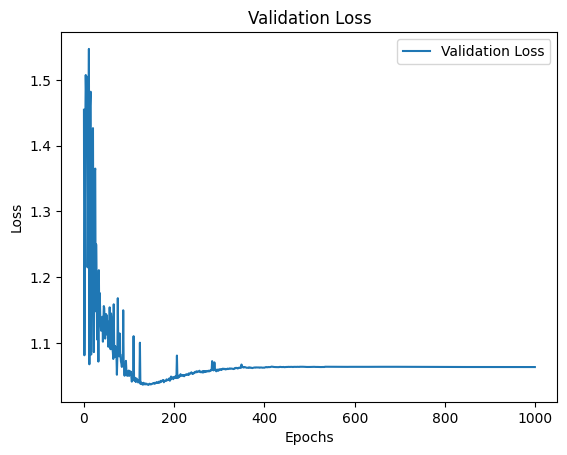

In [50]:
# Plot the validation loss
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

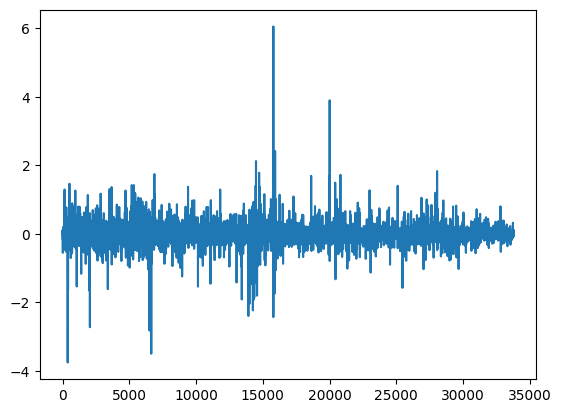

In [422]:
# Transform y_tensor_val from shape (9633, 12, 1) to (9633, 12)
y_tensor_train = y_tensor_train.reshape(y_tensor_train.shape[0], y_tensor_train.shape[1])
plt.plot(pd.DataFrame(y_tensor_train).iloc[:,0].to_frame())